In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'../data/ecommerce_dataset_10000.csv')
df.sample(10)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date
9318,CUST4336,Timothy,Singleton,Female,Senior,2020-09-25,Canada,PROD103,Levi's Jeans,Apparel,2,59,ORD19318,2025-06-07,Pending,PayPal,2,average,REV29318,2024-09-19
8138,CUST1751,Amy,Bryant,Male,Adults,2023-07-23,India,PROD113,Wilson Tennis Racket,Sports,1,149,ORD18138,2024-07-06,Delivered,PayPal,5,good,REV28138,2023-05-30
3847,CUST2541,Todd,Davis,Male,Teenagers,2023-05-12,France,PROD102,Sony Headphones,Electronics,4,199,ORD13847,2025-08-17,Returned,Cash on Delivery,5,very bad,REV23847,2025-02-06
8737,CUST5384,Adam,Thompson,Male,Senior,2025-06-20,Australia,PROD102,Sony Headphones,Electronics,1,199,ORD18737,2024-11-24,Returned,Credit Card,2,average,REV28737,2023-07-06
9406,CUST2995,Ryan,Weaver,Male,Senior,2021-08-25,Australia,PROD108,Fitbit Versa 3,Electronics,5,229,ORD19406,2023-09-07,Pending,Cash on Delivery,2,good,REV29406,2023-11-19
7445,CUST2616,Richard,Davis,Other,Adults,2025-07-21,Japan,PROD101,Samsung Galaxy S23,Electronics,1,899,ORD17445,2023-06-25,Shipped,Cash on Delivery,4,very good,REV27445,2022-12-27
8515,CUST1909,Carolyn,Lowery,Male,Teenagers,2024-01-25,Japan,PROD103,Levi's Jeans,Apparel,1,59,ORD18515,2023-07-11,Returned,PayPal,3,very bad,REV28515,2025-05-29
1043,CUST3122,Kathleen,Conner,Male,Adults,2023-10-28,France,PROD114,Yoga Mat,Sports,5,25,ORD11043,2022-10-13,Pending,Credit Card,3,average,REV21043,2024-03-01
6457,CUST3733,Heather,Russell,Male,Senior,2025-02-11,Australia,PROD113,Wilson Tennis Racket,Sports,2,149,ORD16457,2024-03-31,Shipped,Credit Card,5,average,REV26457,2025-03-13
9720,CUST4471,Jessica,Daniels,Male,Adults,2024-11-30,France,PROD111,Lego Star Wars Set,Toys,2,59,ORD19720,2023-12-31,Shipped,PayPal,5,average,REV29720,2023-07-01


Análise estrutural do DataFrame

In [4]:
df.shape

(10000, 20)

In [5]:
df.isnull().sum()

customer_id       0
first_name        0
last_name         0
gender            0
age_group         0
signup_date       0
country           0
product_id        0
product_name      0
category          0
quantity          0
unit_price        0
order_id          0
order_date        0
order_status      0
payment_method    0
rating            0
review_text       0
review_id         0
review_date       0
dtype: int64

In [6]:
df.describe().round(2)

,quantity,unit_price,rating
count,10000.00,10000.00,10000.00
mean,3.00,246.65,2.99
std,1.42,282.61,1.41
min,1.00,25.00,1.00
25%,2.00,80.00,2.00
50%,3.00,129.00,3.00
75%,4.00,229.00,4.00
max,5.00,999.00,5.00


In [7]:
# Verificação do tipo de cada coluna.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     10000 non-null  object
 1   first_name      10000 non-null  object
 2   last_name       10000 non-null  object
 3   gender          10000 non-null  object
 4   age_group       10000 non-null  object
 5   signup_date     10000 non-null  object
 6   country         10000 non-null  object
 7   product_id      10000 non-null  object
 8   product_name    10000 non-null  object
 9   category        10000 non-null  object
 10  quantity        10000 non-null  int64 
 11  unit_price      10000 non-null  int64 
 12  order_id        10000 non-null  object
 13  order_date      10000 non-null  object
 14  order_status    10000 non-null  object
 15  payment_method  10000 non-null  object
 16  rating          10000 non-null  int64 
 17  review_text     10000 non-null  object
 18  review_

Após essa primera análise de reconhecimento do DataFrame, serão feitos duas principais adições visando futuras análises:

- Inclusão de uma nova coluna chamada receita_total, buscando ter uma visão mais clara da receita por pedido e também geral.
- Alterar as colunas 'signup_date' e 'review_date' para o formato de Datas.

In [8]:
df['receita_total'] = df['quantity'] * df['unit_price']

In [9]:
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     10000 non-null  object        
 1   first_name      10000 non-null  object        
 2   last_name       10000 non-null  object        
 3   gender          10000 non-null  object        
 4   age_group       10000 non-null  object        
 5   signup_date     10000 non-null  datetime64[ns]
 6   country         10000 non-null  object        
 7   product_id      10000 non-null  object        
 8   product_name    10000 non-null  object        
 9   category        10000 non-null  object        
 10  quantity        10000 non-null  int64         
 11  unit_price      10000 non-null  int64         
 12  order_id        10000 non-null  object        
 13  order_date      10000 non-null  datetime64[ns]
 14  order_status    10000 non-null  object        
 15  pay

In [44]:
# Para que todas as colunas do DataFrame sejam visualizadas, definimos que limite de colunas apresentadas para as 21 que o DF possui

pd.set_option('display.max_columns', 25)

In [12]:
# Padronização do estilo gráfico que será utilizado

plt.style.use('seaborn-v0_8')

In [13]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
5121,CUST1776,Darlene,Galvan,Male,Senior,2022-02-22,Australia,PROD103,Levi's Jeans,Apparel,5,59,ORD15121,2022-10-11,Delivered,Credit Card,5,very bad,REV25121,2023-03-20,295
2776,CUST1839,Richard,Fox,Male,Adults,2022-10-31,Brazil,PROD104,Nike Air Max,Apparel,5,120,ORD12776,2024-02-21,Pending,PayPal,3,very good,REV22776,2023-05-22,600
8915,CUST2112,Bridget,Davis,Male,Teenagers,2020-10-31,Australia,PROD111,Lego Star Wars Set,Toys,4,59,ORD18915,2024-04-28,Pending,Credit Card,1,average,REV28915,2024-05-12,236
437,CUST5366,James,Lynch,Other,Senior,2021-12-12,UK,PROD103,Levi's Jeans,Apparel,5,59,ORD10437,2023-11-23,Cancelled,Credit Card,5,average,REV20437,2024-08-08,295
3265,CUST2249,Kyle,Harrington,Other,Teenagers,2021-03-12,France,PROD108,Fitbit Versa 3,Electronics,5,229,ORD13265,2023-04-12,Returned,PayPal,4,bad,REV23265,2025-03-15,1145


Análise Exploratória dos Dados

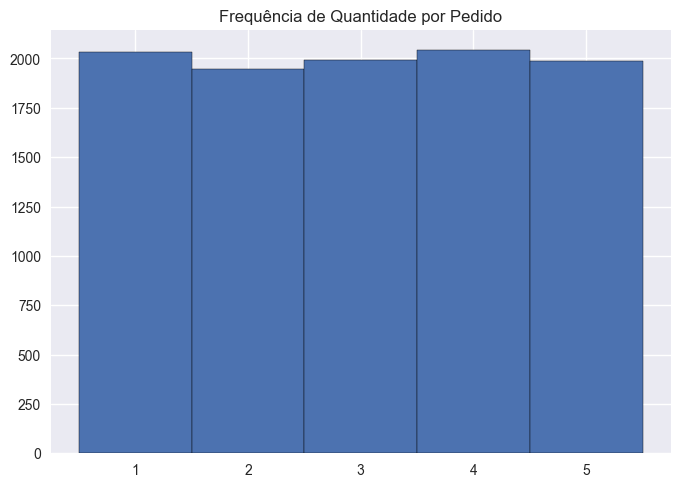

In [14]:
# Histograma da Frequencia da quantidade de produtos selecionados por pedido, com correção da posição e contorno das colunas (bins e edgecolor) para uma melhor visualização

_ = plt.hist(df['quantity'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
_ = plt.title('Frequência de Quantidade por Pedido')
plt.show()

In [15]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
9738,CUST5059,Kathleen,Johnson,Male,Teenagers,2023-02-08,India,PROD109,Kindle Paperwhite,Books,3,129,ORD19738,2025-05-13,Cancelled,PayPal,4,good,REV29738,2023-04-08,387
271,CUST4068,Derek,Hammond,Female,Senior,2024-08-09,Brazil,PROD114,Yoga Mat,Sports,2,25,ORD10271,2023-08-12,Returned,Credit Card,5,very good,REV20271,2024-03-28,50
5804,CUST1018,Teresa,Rivas,Other,Senior,2023-08-25,China,PROD112,Barbie Dreamhouse,Toys,3,199,ORD15804,2023-03-16,Pending,Cash on Delivery,4,very bad,REV25804,2022-11-28,597
124,CUST5542,Matthew,Goodwin,Female,Senior,2021-01-04,Germany,PROD110,Harry Potter Box Set,Books,1,80,ORD10124,2024-05-08,Pending,Cash on Delivery,2,average,REV20124,2024-07-15,80
3748,CUST1829,Jeffrey,Holmes,Male,Senior,2022-07-19,Brazil,PROD102,Sony Headphones,Electronics,4,199,ORD13748,2024-08-11,Pending,PayPal,4,good,REV23748,2024-09-02,796


In [16]:
df.shape

(10000, 21)

In [17]:
# Quantidade de clientes únicos

df['customer_id'].nunique()

4327

Os 10.000 pedidos registrados no período foram feitos por 4.327 clientes únicos. Com isso, vamos identificar clientes com os maiores valores gastos no período.

In [18]:
# Clientes com mais transações feitas no periodo

df['customer_id'].value_counts().head(10).reset_index()

,customer_id,count
0,CUST1244,9
1,CUST5023,8
2,CUST3967,7
3,CUST3759,7
4,CUST2192,7
5,CUST5726,7
6,CUST2066,7
7,CUST1628,7
8,CUST2896,7
9,CUST3798,7


In [19]:
# Clientes com maiores valores gastos no período

top_clientes = df.groupby('customer_id')['receita_total'].sum().sort_values(ascending=False).head(10).reset_index()
top_clientes

,customer_id,receita_total
0,CUST3556,13985
1,CUST4526,12567
2,CUST2419,12078
3,CUST2149,11515
4,CUST1441,11288
5,CUST3955,10989
6,CUST5377,10413
7,CUST4434,10389
8,CUST4765,10364
9,CUST5014,10289


In [20]:
# Abaixo temos as transações e informações do cliente que mais gastou no período. O código também serve como filtro, bastando apenas substituir o ID para visualizar as transações feitas por um cliente no período.

filtro_id = df[df['customer_id'] == 'CUST3556']
filtro_id

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
4549,CUST3556,Beverly,Gallagher,Male,Senior,2023-04-17,Japan,PROD100,iPhone 14,Electronics,1,999,ORD14549,2023-04-15,Shipped,Credit Card,4,very bad,REV24549,2024-10-09,999
7335,CUST3556,Beverly,Gallagher,Male,Senior,2023-04-17,Japan,PROD101,Samsung Galaxy S23,Electronics,5,899,ORD17335,2024-08-24,Cancelled,PayPal,3,bad,REV27335,2024-02-08,4495
8350,CUST3556,Beverly,Gallagher,Male,Senior,2023-04-17,Japan,PROD101,Samsung Galaxy S23,Electronics,5,899,ORD18350,2025-04-14,Cancelled,PayPal,2,very good,REV28350,2023-08-23,4495
9054,CUST3556,Beverly,Gallagher,Male,Senior,2023-04-17,Japan,PROD100,iPhone 14,Electronics,4,999,ORD19054,2024-06-24,Pending,Credit Card,3,average,REV29054,2025-05-20,3996


In [21]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
5294,CUST5909,Donna,Stone,Other,Adults,2023-09-04,Canada,PROD102,Sony Headphones,Electronics,5,199,ORD15294,2025-02-13,Delivered,Cash on Delivery,4,very bad,REV25294,2023-01-17,995
7431,CUST5070,Terri,Hall,Other,Adults,2021-09-01,France,PROD114,Yoga Mat,Sports,5,25,ORD17431,2025-04-18,Cancelled,Cash on Delivery,2,very good,REV27431,2023-12-24,125
8328,CUST2889,Ryan,Mason,Female,Teenagers,2023-07-03,USA,PROD110,Harry Potter Box Set,Books,5,80,ORD18328,2024-07-29,Shipped,PayPal,4,very bad,REV28328,2024-03-11,400
1956,CUST5774,Steven,Roth,Other,Senior,2021-01-25,China,PROD100,iPhone 14,Electronics,2,999,ORD11956,2023-11-19,Shipped,PayPal,2,very bad,REV21956,2023-02-18,1998
1395,CUST3006,Charles,Cruz,Female,Teenagers,2021-12-03,UK,PROD106,Instant Pot,Home & Kitchen,4,99,ORD11395,2023-11-15,Cancelled,Cash on Delivery,1,good,REV21395,2025-04-26,396


Análises de indicardores por País.

In [22]:
transacoes_paises = df['country'].value_counts().head(10).reset_index()
transacoes_paises = transacoes_paises.rename(columns={'count': 'qtde_transacoes'})

receita_paises = df.groupby('country')['receita_total'].sum().sort_values(ascending=False).reset_index()

ticket_paises = df.groupby('country')['receita_total'].mean().sort_values(ascending=False).reset_index()
ticket_paises = ticket_paises.rename(columns={'receita_total': 'ticket_medio'})

In [23]:
from IPython.display import display

display(transacoes_paises)
display(receita_paises)
display(ticket_paises)

,country,qtde_transacoes
0,France,1060
1,China,1054
2,Australia,1043
3,India,1036
4,Brazil,1019
5,Canada,997
6,USA,987
7,Japan,976
8,UK,943
9,Germany,885


,country,receita_total
0,China,815789
1,France,810303
2,Japan,777673
3,USA,767017
4,India,759619
5,Australia,745407
6,Brazil,743066
7,Canada,719928
8,UK,676570
9,Germany,635391


,country,ticket_medio
0,Japan,796.796107
1,USA,777.119554
2,China,773.993359
3,France,764.436792
4,India,733.222973
5,Brazil,729.210991
6,Canada,722.094283
7,Germany,717.955932
8,UK,717.465536
9,Australia,714.675935


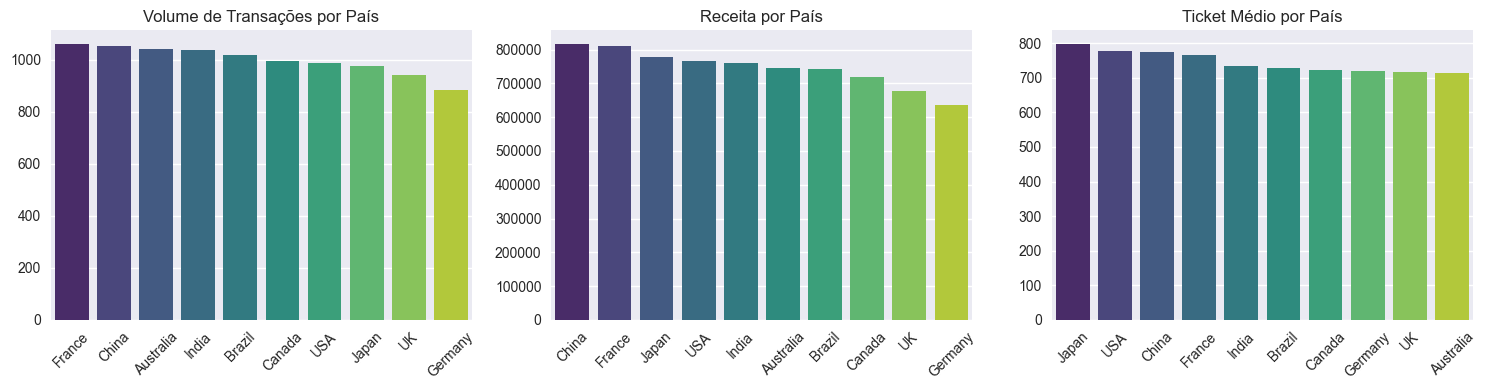

In [24]:
contagem_paises = df['country'].value_counts().head(10).reset_index()
receita_paises = df.groupby('country')['receita_total'].sum().sort_values(ascending=False).reset_index()
ticket_paises = df.groupby('country')['receita_total'].mean().sort_values(ascending=False).reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(data=contagem_paises, x='country', y='count', hue='country', palette='viridis', ax=ax1, legend=False)
ax1.set_title('Volume de Transações por País')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(data=receita_paises, x='country', y='receita_total', hue='country', palette='viridis', ax=ax2, legend=False)
ax2.set_title('Receita por País')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=45)

sns.barplot(data=ticket_paises, x='country', y='receita_total', hue='country', palette='viridis', ax=ax3, legend=False)
ax3.set_title('Ticket Médio por País')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Os três gráficos oferecem importantes informações sobre o comportamento de compra em diferentes países. A principal conclusão que se pode tirar é que volume de transações e ticket médio não andam exatamente juntos, e isso exige estratégias diferentes.

Aqui estão alguns insights e possíveis tomadas de decisão:

### Insights (O que os dados nos dizem)

**Liderança em Volume e Receita:** A China e a França são os mercados de maior volume e receita. Isso indica que eles são os mercados mais importantes e maduros para o negócio.

**Valor por Transação:** O Japão e os EUA têm o ticket médio mais alto, mesmo com um volume de transações e receita total menores. Isso sugere que os clientes nesses países compram produtos mais caros por transação.

**Desafio de Volume vs. Valor:** Países como o Reino Unido (UK) e a Austrália têm um volume de transações similar ao do Japão, mas com um ticket médio muito mais baixo.

### Tomadas de Decisão (Como usar os dados)

**Estratégia para o Japão e os EUA:** O foco não deve ser apenas em aumentar o número de transações, mas sim em campanhas de up-selling e cross-selling (venda de produtos complementares) para os clientes existentes, promovendo produtos de maior valor. O potencial de receita nesses mercados é alto.

**Estratégia para a China e a França:** Como são mercados de alto volume e receita, a estratégia deve ser de retenção e fidelização. A empresa pode oferecer programas de pontos ou promoções exclusivas para manter a liderança.

**Estratégia para o Reino Unido e a Austrália:** O foco deve ser em aumentar o número de itens por transação ou em promoções de volume, como "leve 3, pague 2", para elevar o ticket médio e, consequentemente, a receita total.

Em resumo, a análise conjunta dos três gráficos permite uma estratégia de mercado muito mais segmentada e eficaz do que olhar para apenas uma métrica isoladamente.

In [25]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
7397,CUST3206,Traci,Velez,Other,Teenagers,2022-04-28,Australia,PROD114,Yoga Mat,Sports,3,25,ORD17397,2024-11-26,Delivered,PayPal,5,good,REV27397,2023-08-15,75
6469,CUST5023,Louis,Harding,Other,Senior,2021-06-11,India,PROD106,Instant Pot,Home & Kitchen,4,99,ORD16469,2025-06-11,Cancelled,Credit Card,4,good,REV26469,2024-04-20,396
8981,CUST3339,Vincent,Williams,Other,Teenagers,2022-09-29,Germany,PROD104,Nike Air Max,Apparel,3,120,ORD18981,2025-03-26,Returned,PayPal,3,good,REV28981,2023-10-27,360
2791,CUST2139,Michael,Peck,Female,Adults,2021-04-10,Japan,PROD112,Barbie Dreamhouse,Toys,3,199,ORD12791,2024-08-29,Pending,PayPal,1,average,REV22791,2025-01-11,597
2369,CUST2948,Jason,Lane,Male,Teenagers,2023-08-19,India,PROD111,Lego Star Wars Set,Toys,4,59,ORD12369,2023-11-10,Shipped,Credit Card,4,very good,REV22369,2024-05-06,236


Análise de Produtos e Categorias de Produtos.

In [26]:
# Contagem de produtos vendidos por categoria

qtde_categoria = df['category'].value_counts().reset_index()
qtde_categoria = qtde_categoria.rename(columns={'count': 'qtde_vendida'})
qtde_categoria

,category,qtde_vendida
0,Electronics,2616
1,Apparel,2047
2,Home & Kitchen,1391
3,Books,1334
4,Toys,1314
5,Sports,1298


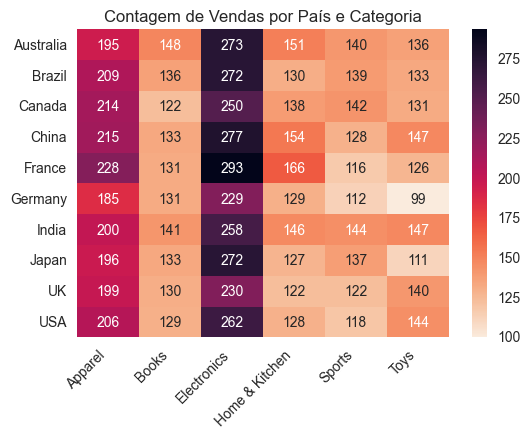

In [27]:
# Aqui cruzamos as colunas de Países x Categoria de Produtos, buscando observar onde se concentra o maior volume de vendas nessa relação.

df_categoria = pd.crosstab(index=df['country'], columns=df['category'])

plt.figure(figsize=(6, 4))
sns.heatmap(df_categoria, annot=True, fmt='d', cmap='rocket_r')  # fmt é a abreviação de "format" (formato). O 'd' significa "decimal" e garante que os números sejam exibidos como inteiros.
                                                                 # annot é a abreviação de "annotate". Ao definir annot=True, o Seaborn é instruido a exibir o valor numérico de cada célula diretamente no mapa de calor.
plt.title('Contagem de Vendas por País e Categoria')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# Quantidade vendida de cada produto

qtde_produtos = df['product_name'].value_counts().reset_index()
qtde_produtos = qtde_produtos.rename(columns={'count': 'qtde_vendida'})
qtde_produtos

,product_name,qtde_vendida
0,Dyson Vacuum,730
1,Levi's Jeans,693
2,Sony Headphones,689
3,Adidas Running Shoes,680
4,Harry Potter Box Set,676
5,Nike Air Max,674
6,Instant Pot,661
7,Wilson Tennis Racket,661
8,Fitbit Versa 3,659
9,Lego Star Wars Set,658


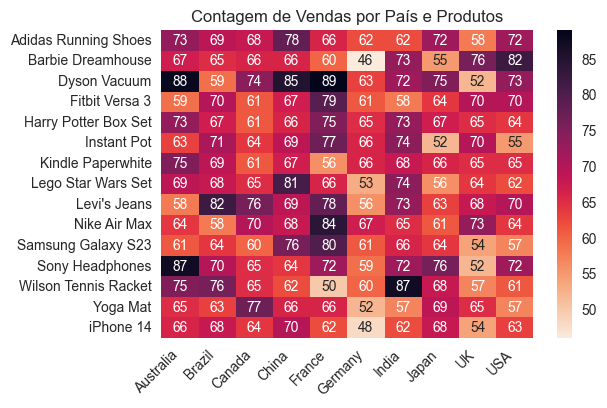

In [29]:
# Assim como no heatmap das categorias de produtos, aqui visualizamos a concentração do volume de vendas dos produtos em si por País.

df_produtos = pd.crosstab(index=df['product_name'], columns=df['country'])

plt.figure(figsize=(6, 4))
sns.heatmap(df_produtos, annot=True, fmt='d', cmap='rocket_r')

plt.title('Contagem de Vendas por País e Produtos')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
receita_categoria = df.groupby('category')['receita_total'].sum().sort_values(ascending=False).reset_index()
receita_categoria 

,category,receita_total
0,Electronics,4529986
1,Home & Kitchen,1069650
2,Apparel,597636
3,Toys,499894
4,Books,415797
5,Sports,337800


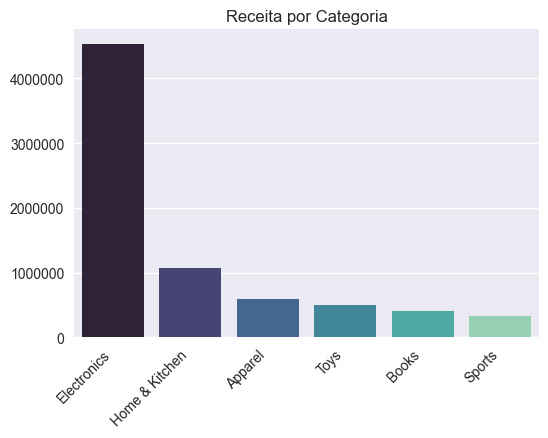

In [31]:
# Receita por Categoria

receita_categoria = df.groupby('category')['receita_total'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=receita_categoria, x='category', y='receita_total', hue='category', palette='mako')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Receita por Categoria')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
5088,CUST3350,Sara,Perry,Other,Teenagers,2023-08-03,Canada,PROD108,Fitbit Versa 3,Electronics,3,229,ORD15088,2023-12-05,Shipped,PayPal,5,average,REV25088,2023-03-12,687
2669,CUST5722,Adam,Hayes,Other,Adults,2024-06-10,Australia,PROD113,Wilson Tennis Racket,Sports,2,149,ORD12669,2024-09-14,Returned,PayPal,4,very bad,REV22669,2024-04-27,298
1091,CUST5253,Chad,Hamilton,Male,Senior,2023-03-14,France,PROD113,Wilson Tennis Racket,Sports,2,149,ORD11091,2023-07-29,Returned,Credit Card,4,very good,REV21091,2023-10-30,298
5655,CUST2197,William,Dodson,Female,Senior,2023-05-04,USA,PROD103,Levi's Jeans,Apparel,4,59,ORD15655,2023-07-26,Pending,Cash on Delivery,1,bad,REV25655,2024-12-23,236
6800,CUST3027,Michelle,Dixon,Other,Teenagers,2022-10-10,China,PROD109,Kindle Paperwhite,Books,5,129,ORD16800,2023-09-10,Delivered,PayPal,4,very bad,REV26800,2024-11-21,645


Análise de Métodos de Pagamento

In [33]:
pagamentos = df['payment_method'].value_counts().sort_values(ascending=False).reset_index()

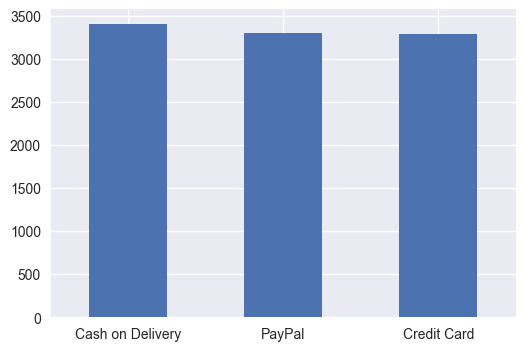

In [34]:
_ = df['payment_method'].value_counts().plot.bar(figsize=(6, 4), rot=0, xlabel='')

Análise de Grupos de Idade

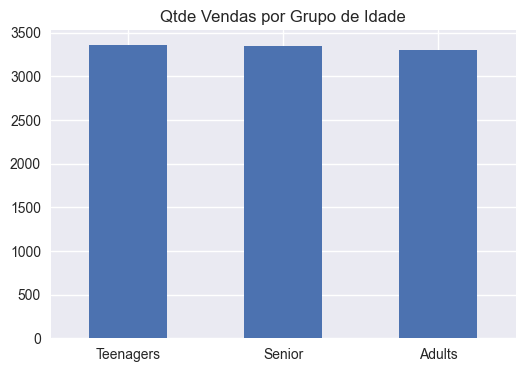

In [35]:
_ = df['age_group'].value_counts().plot.bar(figsize=(6, 4), rot=0, xlabel='')
_ = plt.title('Qtde Vendas por Grupo de Idade')

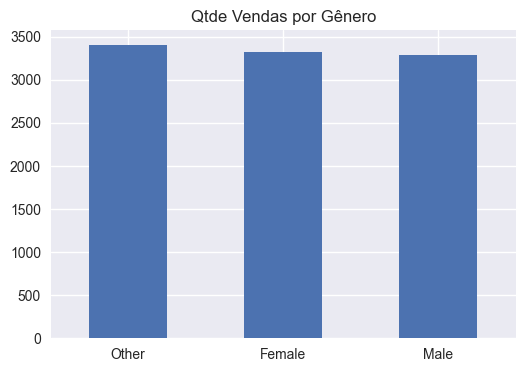

In [36]:
_ = df['gender'].value_counts().plot.bar(figsize=(6, 4), rot=0, xlabel='')
_ = plt.title('Qtde Vendas por Gênero')

Análises de Correlação

In [37]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
573,CUST2050,Shawn,Cobb,Female,Adults,2023-07-15,Brazil,PROD110,Harry Potter Box Set,Books,5,80,ORD10573,2024-12-11,Returned,PayPal,4,bad,REV20573,2023-05-29,400
3904,CUST1458,Natalie,Castaneda,Male,Senior,2023-04-24,Australia,PROD102,Sony Headphones,Electronics,4,199,ORD13904,2024-09-10,Pending,Cash on Delivery,3,bad,REV23904,2024-08-08,796
4022,CUST4549,Peter,Perez,Male,Adults,2021-10-16,Japan,PROD113,Wilson Tennis Racket,Sports,1,149,ORD14022,2023-09-16,Pending,Credit Card,2,very good,REV24022,2023-12-17,149
7448,CUST1779,Felicia,Hoffman,Female,Adults,2024-05-30,Brazil,PROD107,Dyson Vacuum,Home & Kitchen,1,399,ORD17448,2024-07-25,Delivered,PayPal,5,very good,REV27448,2024-12-22,399
4907,CUST1763,Kimberly,Lawson,Other,Senior,2023-01-31,Australia,PROD109,Kindle Paperwhite,Books,3,129,ORD14907,2025-02-24,Cancelled,Cash on Delivery,2,bad,REV24907,2025-02-26,387


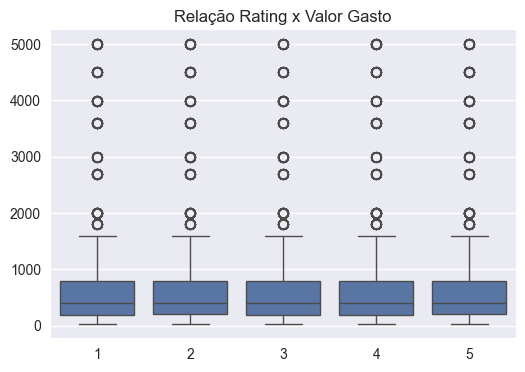

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='rating', y='receita_total')
plt.title('Relação Rating x Valor Gasto')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     10000 non-null  object        
 1   first_name      10000 non-null  object        
 2   last_name       10000 non-null  object        
 3   gender          10000 non-null  object        
 4   age_group       10000 non-null  object        
 5   signup_date     10000 non-null  datetime64[ns]
 6   country         10000 non-null  object        
 7   product_id      10000 non-null  object        
 8   product_name    10000 non-null  object        
 9   category        10000 non-null  object        
 10  quantity        10000 non-null  int64         
 11  unit_price      10000 non-null  int64         
 12  order_id        10000 non-null  object        
 13  order_date      10000 non-null  datetime64[ns]
 14  order_status    10000 non-null  object        
 15  pay

In [40]:
df_index = df.set_index('order_date')
df_index.head(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
order_date,,,,,,,,,,,,,,,,,,,,
2023-07-13,CUST2353,Erica,Oliver,Female,Teenagers,2022-06-29,Canada,PROD108,Fitbit Versa 3,Electronics,3,229,ORD10000,Pending,Credit Card,2,good,REV20000,2025-06-06,687
2024-08-12,CUST4463,Christopher,White,Male,Adults,2023-08-24,China,PROD103,Levi's Jeans,Apparel,4,59,ORD10001,Pending,PayPal,2,average,REV20001,2023-08-05,236
2024-08-04,CUST4512,Spencer,Foster,Male,Senior,2023-07-18,Germany,PROD111,Lego Star Wars Set,Toys,2,59,ORD10002,Delivered,Cash on Delivery,5,good,REV20002,2023-01-03,118
2025-05-23,CUST5711,Jessica,Harris,Male,Teenagers,2025-08-22,France,PROD107,Dyson Vacuum,Home & Kitchen,4,399,ORD10003,Delivered,Cash on Delivery,2,very good,REV20003,2023-03-14,1596
2023-07-02,CUST1296,Amy,Johnson,Female,Teenagers,2021-03-23,Brazil,PROD105,Adidas Running Shoes,Apparel,1,110,ORD10004,Returned,Cash on Delivery,1,very good,REV20004,2023-10-18,110


In [41]:
df_mensal = df_index.resample('M')['receita_total'].sum()
df_mensal

C:\Users\cesar\AppData\Local\Temp\ipykernel_20436\130957276.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df_index.resample('M')['receita_total'].sum()


order_date
2022-08-31     59094
2022-09-30    161540
2022-10-31    226862
2022-11-30    217207
2022-12-31    182328
2023-01-31    194910
2023-02-28    160193
2023-03-31    226185
2023-04-30    229076
2023-05-31    236284
2023-06-30    197018
2023-07-31    207817
2023-08-31    190483
2023-09-30    231165
2023-10-31    197801
2023-11-30    230382
2023-12-31    188711
2024-01-31    193275
2024-02-29    180858
2024-03-31    201151
2024-04-30    212243
2024-05-31    198556
2024-06-30    240348
2024-07-31    207456
2024-08-31    247751
2024-09-30    219328
2024-10-31    208396
2024-11-30    211909
2024-12-31    184730
2025-01-31    207064
2025-02-28    217049
2025-03-31    196312
2025-04-30    217914
2025-05-31    197934
2025-06-30    208290
2025-07-31    215346
2025-08-31    147797
Freq: ME, Name: receita_total, dtype: int64

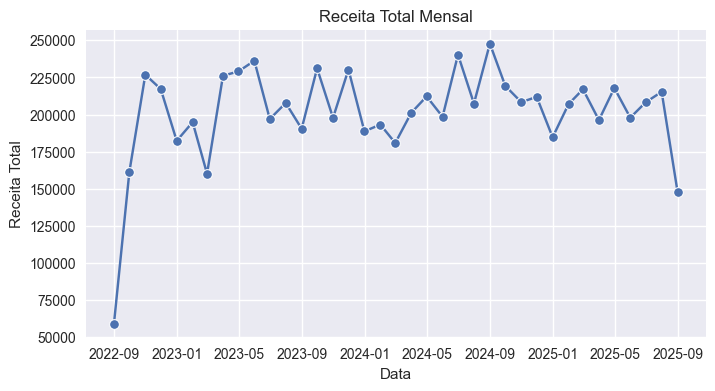

In [42]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_mensal, marker='o')
plt.title('Receita Total Mensal')
plt.xlabel('Data')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

In [45]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
2404,CUST5596,Sean,Gonzales,Other,Adults,2024-12-30,Brazil,PROD106,Instant Pot,Home & Kitchen,1,99,ORD12404,2025-04-09,Returned,PayPal,4,average,REV22404,2025-01-29,99
6514,CUST4107,Diane,Bates,Other,Senior,2023-11-08,Brazil,PROD114,Yoga Mat,Sports,1,25,ORD16514,2024-06-15,Pending,PayPal,3,average,REV26514,2022-12-02,25
5481,CUST5590,Darren,Brown,Other,Senior,2022-07-14,USA,PROD107,Dyson Vacuum,Home & Kitchen,4,399,ORD15481,2023-03-25,Cancelled,Cash on Delivery,3,average,REV25481,2025-04-16,1596
8038,CUST3869,Angela,Thompson,Female,Teenagers,2024-06-28,Germany,PROD106,Instant Pot,Home & Kitchen,1,99,ORD18038,2025-04-30,Pending,Credit Card,3,average,REV28038,2023-03-21,99
8357,CUST5833,Adrian,Buchanan,Male,Adults,2024-07-13,Japan,PROD109,Kindle Paperwhite,Books,4,129,ORD18357,2023-09-29,Cancelled,Credit Card,4,good,REV28357,2023-03-19,516
